In [50]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import statsmodels.api as smd
from sklearn.linear_model import LogisticRegression
import scipy.stats as staticmethod
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


## Import the dataset

In [51]:
churn_data = pd.read_csv('Telecom_CustomerChurn.csv')
churn_data.head()
# churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [53]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [54]:
churn_data.shape

(7043, 21)

In [55]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data preprocessing

In [56]:
# There are spaces in total charges, replace it.
churn_data['TotalCharges'] = churn_data['TotalCharges'].replace(' ', np.nan)
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges']) # convert object field to numeric type.

In [57]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
# Print rows where TotalCharges are NaN

churn_data[churn_data['TotalCharges'].isna()]

# Print these rows
# print(nan_rows)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Converting spaces(' ') in TotalCharges to NaN lead to missing values. But we have a method to fill in this value. 

`TotalCharges = MonthlyCharges * tenure`

We will later drop `TotalCharges` column due to collinearity with `MonthlyCharges` and `Tenure`

In [59]:
value = churn_data['MonthlyCharges'] * churn_data['tenure']

In [60]:
# churn_data['TotalCharges'] = value.where(churn_data['TotalCharges'] == np.nan, other=churn_data['TotalCharges'])
churn_data['TotalCharges'] = churn_data['TotalCharges'].fillna(value)

In [61]:
churn_data[churn_data['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## Exploratory Data Analysis

### Univariate analysis

(array([2701., 1227.,  685.,  503.,  460.,  414.,  396.,  311.,  224.,
         122.]),
 array([   0.  ,  868.48, 1736.96, 2605.44, 3473.92, 4342.4 , 5210.88,
        6079.36, 6947.84, 7816.32, 8684.8 ]),
 <BarContainer object of 10 artists>)

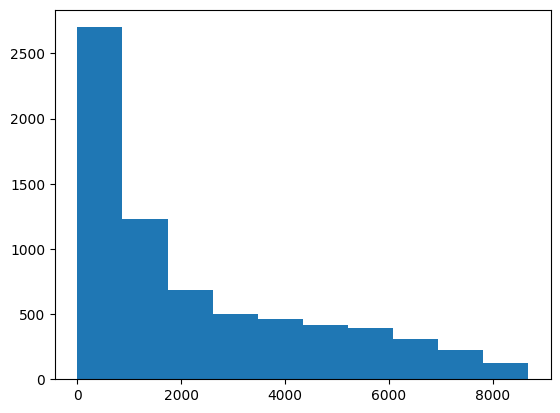

In [62]:
# Distribution of TotalCharges

plt.hist(churn_data['TotalCharges'])

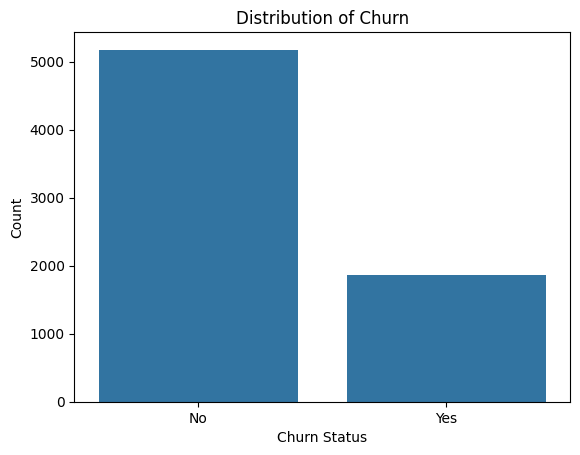

In [63]:
# Display count of churn

# data = pd.DataFrame(churn_data['Churn'])
plt1 = sns.countplot(x='Churn', data=churn_data)
plt.title('Distribution of Churn')  # Adds a title to the plot
plt.xlabel('Churn Status')  # Adds a label to the x-axis
plt.ylabel('Count')  # Adds a label to the y-axis
plt.show()  # Displays the plot

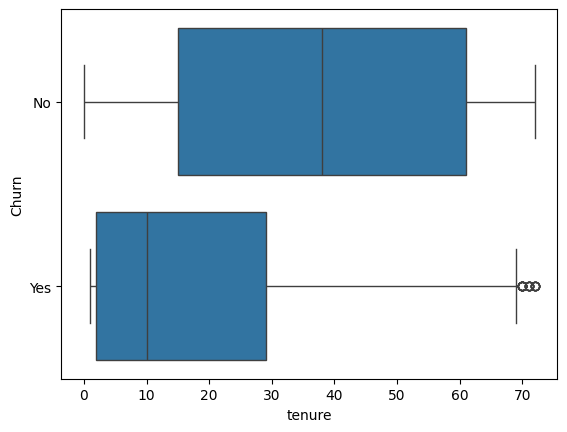

In [64]:
# Tenure

plt1 = sns.boxplot(x='tenure', y='Churn', data=churn_data)


### Find for which kind of Contracts the churn probability is more

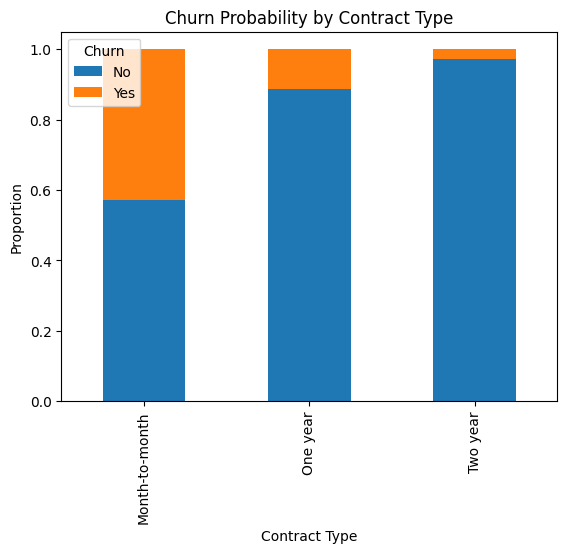

In [65]:
# Grouping the data by contract type and churn status
contract_churn = churn_data.groupby(['Contract', 'Churn']).size().unstack()

# Calculating the churn probability
churn_prob = contract_churn.div(contract_churn.sum(axis=1), axis=0)

# Plotting the churn probability for each contract type
churn_prob.plot(kind='bar', stacked=True)
plt.title('Churn Probability by Contract Type')
plt.ylabel('Proportion')
plt.xlabel('Contract Type')
plt.show()


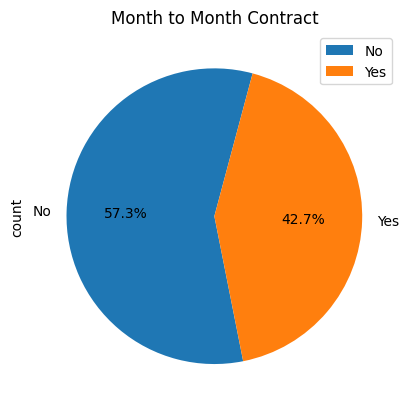

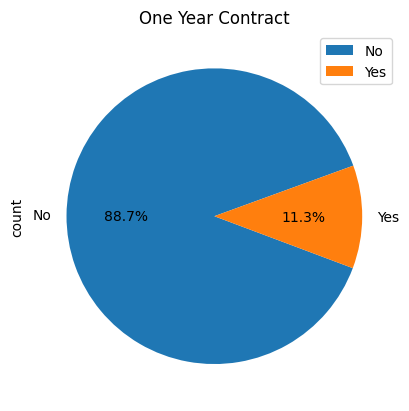

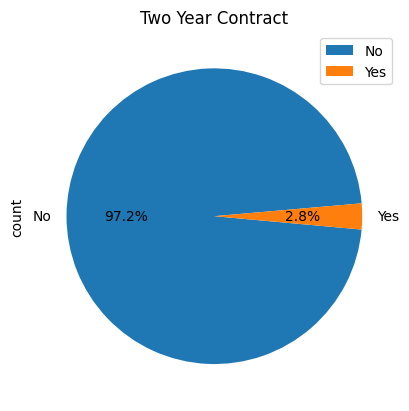

In [66]:
pie_Contract_m2m = pd.DataFrame(churn_data[churn_data['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(churn_data[churn_data['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(churn_data[churn_data['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

**Obseravation**

- Customers with one-year contract and two-year contract tend to churn less

### Check if being on monthly charges has any influence on churn

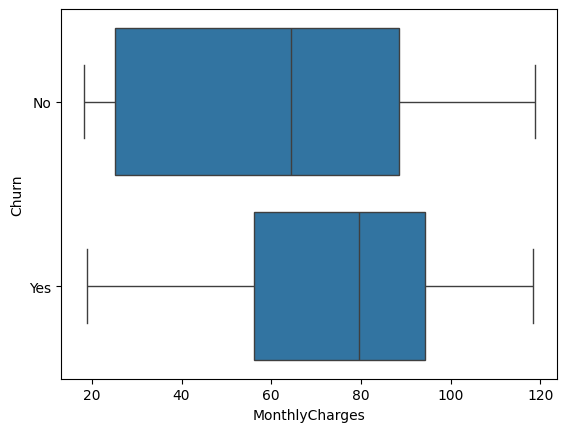

In [67]:
# Check if monthly charges are influential to churn

sns.boxplot(x='MonthlyCharges', y='Churn', data=churn_data)
plt.show()

**Observation**

- Median of churn for monthly charges are high

### Check if total charges are influential to churn

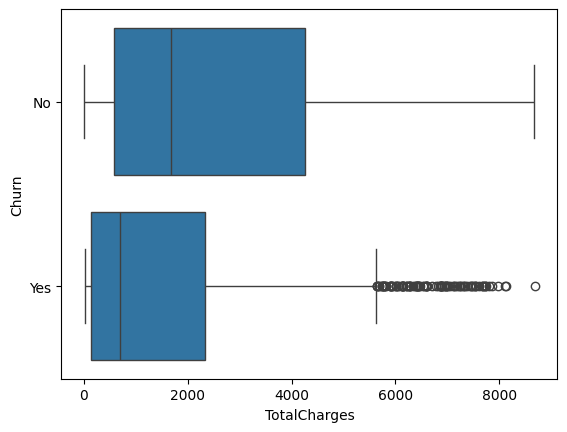

In [68]:
# Check if total charges are influential to churn

sns.boxplot(x='TotalCharges', y='Churn', data=churn_data)
plt.show()

**Observation**

- Median of non-churn cases are higher than churned cases. So less likely.
- The median for non-churn are less when looking at monthly charges, because the chances to churn are higher when being in a low tenure.

### Check whether having multiple internet connection have a influence on churn


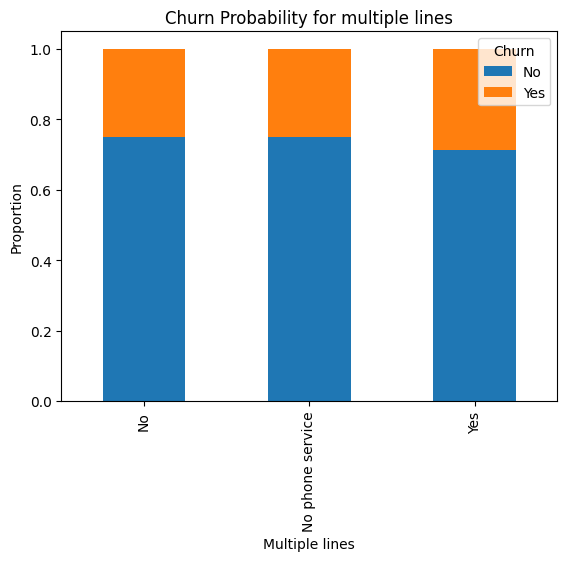

In [69]:
# Check whether having multiple internet connection have a influence on churn

contract_churn = churn_data.groupby(['MultipleLines', 'Churn']).size().unstack()

# Calculating the churn probability
churn_prob = contract_churn.div(contract_churn.sum(axis=1), axis=0)

# Plotting the churn probability for each contract type
churn_prob.plot(kind='bar', stacked=True)
plt.title('Churn Probability for multiple lines')
plt.ylabel('Proportion')
plt.xlabel('Multiple lines')
plt.show()


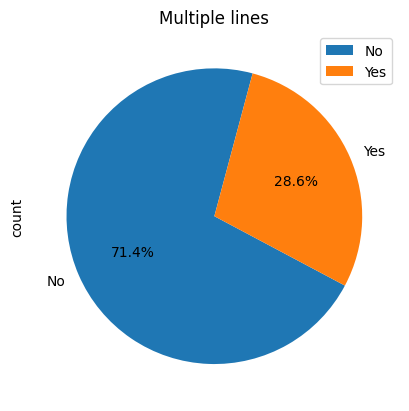

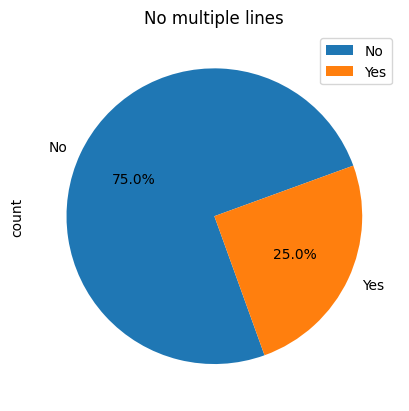

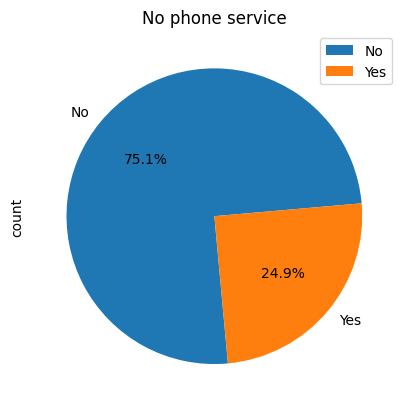

In [70]:
pie_Contract_m2m = pd.DataFrame(churn_data[churn_data['MultipleLines'] == "Yes"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Multiple lines')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(churn_data[churn_data['MultipleLines'] == "No"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('No multiple lines')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(churn_data[churn_data['MultipleLines'] == "No phone service"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('No phone service')
plt.gca().set_aspect('equal')

plt.show()

**Observation**

- It doesnt affect churn that much.

### Whether type of Internet Service has influence on Churn

In [71]:
churn_data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

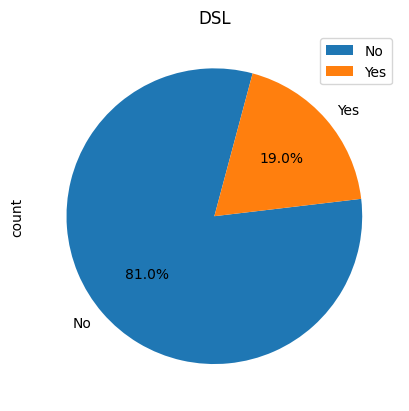

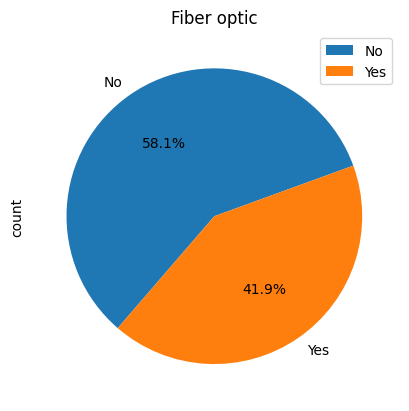

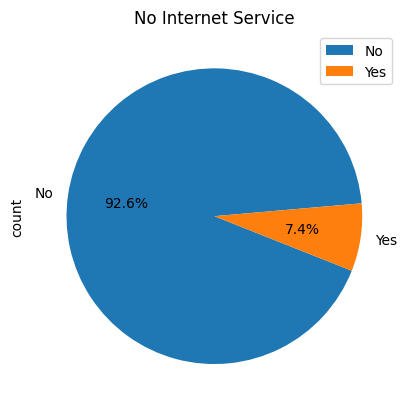

In [72]:
pie_Contract_m2m = pd.DataFrame(churn_data[churn_data['InternetService'] == "DSL"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('DSL')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(churn_data[churn_data['InternetService'] == "Fiber optic"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('Fiber optic')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(churn_data[churn_data['InternetService'] == "No"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('No Internet Service')
plt.gca().set_aspect('equal')

plt.show()

**Observation**

- Customers with fibre optic has higher chance to churn compared to others

In [73]:
churn_data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

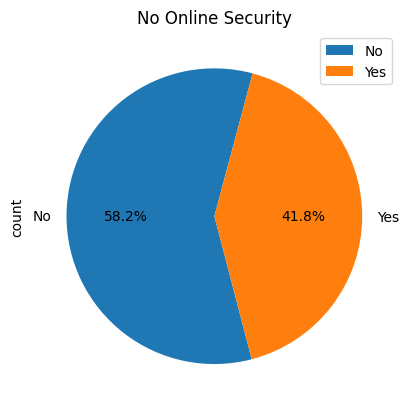

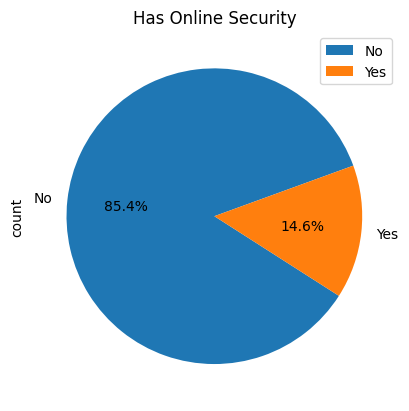

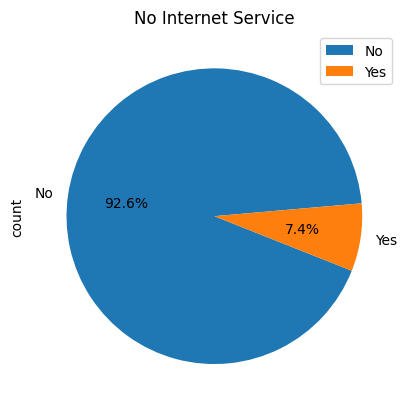

In [74]:
pie_Contract_m2m = pd.DataFrame(churn_data[churn_data['OnlineSecurity'] == "No"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('No Online Security')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(churn_data[churn_data['OnlineSecurity'] == "Yes"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('Has Online Security')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(churn_data[churn_data['OnlineSecurity'] == "No internet service"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('No Internet Service')
plt.gca().set_aspect('equal')

plt.show()

In [75]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Pre-processing

### Convert binary categorical features(yes/no) to 1/0

In [76]:
# Get list of features with binary category

binary_features = []

for column in churn_data.columns:
    values = churn_data[column].unique()
    
    if set(values) == {"Yes", "No"}:
        binary_features.append(column)

print(binary_features)

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [77]:
# Convert to 0/1

def binary_map(x):
    return x.map({"Yes": 1, "No": 0})

churn_data[binary_features] = churn_data[binary_features].apply(binary_map)

In [78]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


### For Nominal Categorical Features with multiple possible values, create dummy variable (one-hot encoding)

In [79]:
categorical_features = ["gender", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]

dummies = pd.get_dummies(churn_data[categorical_features], drop_first=True, dtype=int) # dtype=int is given so that the output is 0/1 instead of True/False.

churn_data = pd.concat([churn_data, dummies], axis=1)

# Drop original features
churn_data = churn_data.drop(columns=categorical_features)

In [80]:
churn_data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [81]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  gender_Male                            7043 non-null   int64  
 11  Mult

### Check for missing values

In [82]:
churn_data.isnull().sum()

customerID                               0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV

## Test-Train split of input dataset

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# Drop 'customerID' from feature variables
X = churn_data.drop(['customerID'], axis=1)

# Separate the target variable 'Churn'
y = X.pop('Churn')


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
877,0,0,1,51,0,0,60.15,3077.00,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0
5792,1,0,0,15,1,1,96.30,1426.75,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
5334,0,1,1,49,1,1,107.95,5293.20,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
878,0,0,0,60,1,0,64.75,4039.50,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
6578,0,0,1,10,1,0,73.55,693.30,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0


In [88]:
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
877,0,0,1,0.754422,0,0,-0.145568,0.350963,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0
5792,1,0,0,-0.710751,1,1,1.051796,-0.377957,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
5334,0,1,1,0.673024,1,1,1.437668,1.329866,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
878,0,0,0,1.120716,1,0,0.006794,0.776103,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
6578,0,0,1,-0.914247,1,0,0.298268,-0.701925,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0


### Finding correlation among features

In [89]:
corr = X_train.corr()
corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, SeniorCitizen to PaymentMethod_Mailed check
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          30 non-null     float64
 1   Partner                                30 non-null     float64
 2   Dependents                             30 non-null     float64
 3   tenure                                 30 non-null     float64
 4   PhoneService                           30 non-null     float64
 5   PaperlessBilling                       30 non-null     float64
 6   MonthlyCharges                         30 non-null     float64
 7   TotalCharges                           30 non-null     float64
 8   gender_Male                            30 non-null     float64
 9   MultipleLines_No phone service         30 non-null     float64
 10  MultipleLines_Yes                      30 non

In [90]:
# Find fields with high correlation

correlated_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7:
            colname1 = corr.columns[i]
            colname2 = corr.columns[j]
            print(abs(corr.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.8253441685693389 -- 7 -- 3 -- TotalCharges -- tenure
0.9999999999999999 -- 9 -- 4 -- MultipleLines_No phone service -- PhoneService
0.783298770700803 -- 11 -- 6 -- InternetService_Fiber optic -- MonthlyCharges
0.7709022237263566 -- 12 -- 6 -- InternetService_No -- MonthlyCharges
0.7709022237263566 -- 13 -- 6 -- OnlineSecurity_No internet service -- MonthlyCharges
1.0 -- 13 -- 12 -- OnlineSecurity_No internet service -- InternetService_No
0.7709022237263566 -- 15 -- 6 -- OnlineBackup_No internet service -- MonthlyCharges
1.0 -- 15 -- 12 -- OnlineBackup_No internet service -- InternetService_No
1.0 -- 15 -- 13 -- OnlineBackup_No internet service -- OnlineSecurity_No internet service
0.7709022237263566 -- 17 -- 6 -- DeviceProtection_No internet service -- MonthlyCharges
1.0 -- 17 -- 12 -- DeviceProtection_No internet service -- InternetService_No
1.0 -- 17 -- 13 -- DeviceProtection_No internet service -- OnlineSecurity_No internet service
1.0 -- 17 -- 15 -- DeviceProtection_No internet 

In [91]:
print(corr.columns)
print('------')
print(correlated_features)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
------
{'InternetService_No', 'TotalCharges', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'InternetService_Fiber o

In [92]:
len(['MonthlyCharges', 'TotalCharges', 'tenure', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'InternetService_No', 'OnlineSecurity_No internet service', 'StreamingMovies_No internet service', 'InternetService_Fiber optic', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'MultipleLines_No phone service', 'PhoneService'])

13

### Dropping highly correlated features

In [93]:
values_to_drop = ['TotalCharges', 'InternetService_Fiber optic', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'StreamingMovies_No internet service', 
                'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'DeviceProtection_No internet service']

X_train = X_train.drop(columns=list(values_to_drop))

X_test = X_test.drop(columns=list(values_to_drop))


### Print correlation matrix heatmap

<Axes: >

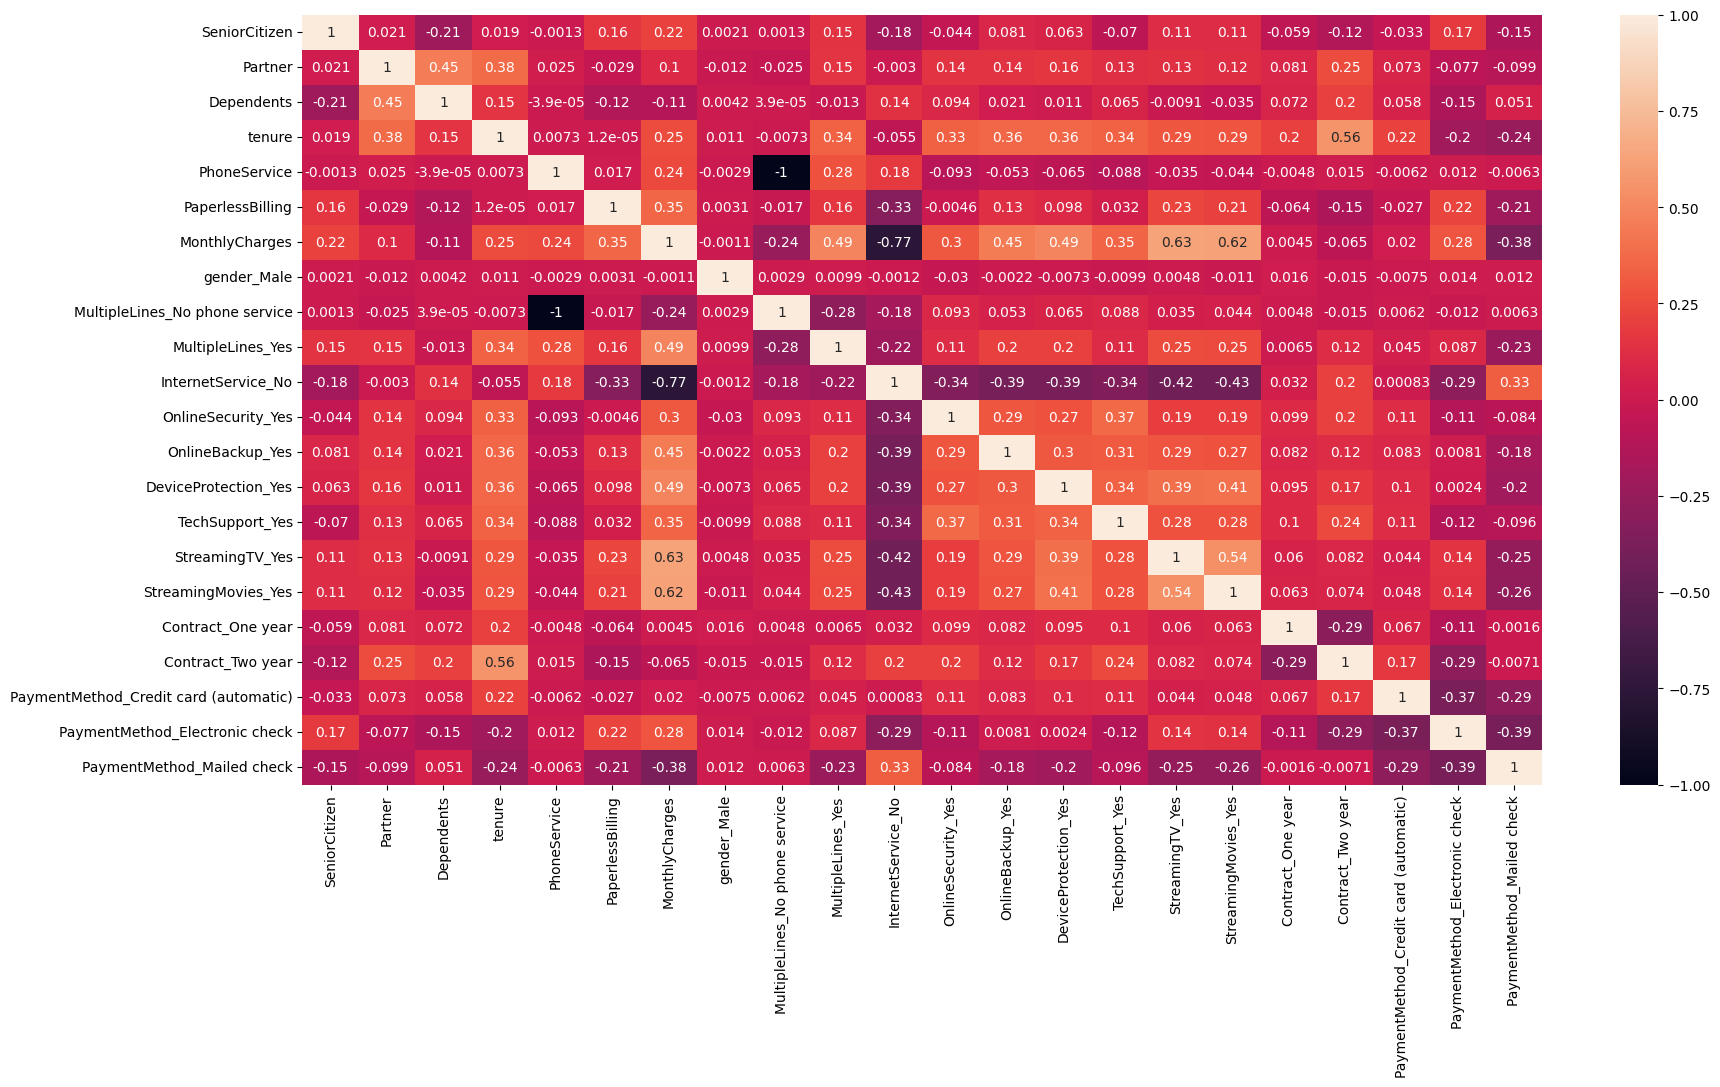

In [94]:
plt.figure(figsize=(20, 10))
sns.heatmap(X_train.corr(), annot=True)

## Create logistic regression model


**add_constant()**

By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept. Hence, you need to use thecommand 'add_constant' so that it also fits an intercept.

In [95]:
from statsmodels.tools import add_constant

X_train_constant = add_constant(X_train)

X_train_constant.info()
X_train_constant.head()


<class 'pandas.core.frame.DataFrame'>
Index: 4930 entries, 877 to 5640
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   const                                  4930 non-null   float64
 1   SeniorCitizen                          4930 non-null   int64  
 2   Partner                                4930 non-null   int64  
 3   Dependents                             4930 non-null   int64  
 4   tenure                                 4930 non-null   float64
 5   PhoneService                           4930 non-null   int64  
 6   PaperlessBilling                       4930 non-null   int64  
 7   MonthlyCharges                         4930 non-null   float64
 8   gender_Male                            4930 non-null   int64  
 9   MultipleLines_No phone service         4930 non-null   int64  
 10  MultipleLines_Yes                      4930 non-null   int64  
 11  Interne

,const,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
877,1.0,0,0,1,0.754422,0,0,-0.145568,0,1,0,0,1,0,1,1,1,1,1,0,0,0,0
5792,1.0,1,0,0,-0.710751,1,1,1.051796,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1
5334,1.0,0,1,1,0.673024,1,1,1.437668,0,0,1,0,0,1,1,1,1,1,0,1,0,0,0
878,1.0,0,0,0,1.120716,1,0,0.006794,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0
6578,1.0,0,0,1,-0.914247,1,0,0.298268,0,0,1,0,1,0,1,1,0,1,1,0,1,0,0


In [96]:
cols = X_train_constant.columns

model = smd.Logit(y_train, X_train_constant[cols])

result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.408829
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4908
Method:                           MLE   Df Model:                           21
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.2921
Time:                        21:20:05   Log-Likelihood:                -2015.5
converged:                       True   LL-Null:                       -2847.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2829   3.26e+06  -8.68e-08      1.000   -6.39e+06    6.39e+06
SeniorCitizen                             0.2972      0.103      2.890      0.004       0.096       0.499
Partner                                   0.0304      0.094      0.323      0.746      -0.154       0.214
Dependents                               -0.2282      0.108     -2.120      0.034      -0.439      -0.017
tenure                                   -0.8243      0.070    -11.802      0.000      -0.961      -0.687
PhoneService                             -0.7273   3.26e+06  -2.23e-07      1.000   -6.39e+06    6.39e+06
PaperlessBilling                          0.3454      0.090      3.841      0.000       0.169       0.522
MonthlyCharges                            1.0495      0.133      7.897      0.000       0.789       1.310
gender_Male                              -0.0374      0.078     -0.477      0.634      -0.191       0.116
MultipleLines_No phone service            0.4444   3.26e+06   1.36e-07      1.000   -6.39e+06    6.39e+06
MultipleLines_Yes                         0.1761      0.100      1.758      0.079      -0.020       0.373
InternetService_No                       -0.0719      0.229     -0.314      0.754      -0.521       0.377
OnlineSecurity_Yes                       -0.4308      0.101     -4.250      0.000      -0.629      -0.232
OnlineBackup_Yes                         -0.3926      0.094     -4.158      0.000      -0.578      -0.208
DeviceProtection_Yes                     -0.1780      0.098     -1.813      0.070      -0.371       0.014
TechSupport_Yes                          -0.6461      0.104     -6.230      0.000      -0.849      -0.443
StreamingTV_Yes                          -0.0846      0.108     -0.781      0.435      -0.297       0.128
StreamingMovies_Yes                      -0.1144      0.108     -1.059      0.290      -0.326       0.097
Contract_One year                        -0.6755      0.129     -5.257      0.000      -0.927      -0.424
Contract_Two year                        -1.3142      0.205     -6.400      0.000      -1.717      -0.912
PaymentMethod_Credit card (automatic)    -0.1464      0.138     -1.061      0.289      -0.417       0.124
PaymentMethod_Electronic check            0.2832      0.114      2.481      0.013       0.059       0.507
PaymentMethod_Mailed check               -0.0446      0.137     -0.325      0.745      -0.314       0.225
=========================================================================================================
"""

### Dropping features with p-values greater than 0.05

In [102]:
features_drop = ['Partner', 'PhoneService', 'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_No', 'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check']

X_train_constant.drop(features_drop, axis=1, inplace=True)


### Recreate Logit model

In [104]:
model = smd.Logit(y_train, X_train_constant)

result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.414938
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4918
Method:                           MLE   Df Model:                           11
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.2815
Time:                        21:40:20   Log-Likelihood:                -2045.6
converged:                       True   LL-Null:                       -2847.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1000      0.108    -10.162      0.000      -1.312      -0.888
SeniorCitizen                      0.3664      0.101      3.613      0.000       0.168       0.565
Dependents                        -0.2323      0.097     -2.398      0.017      -0.422      -0.042
tenure                            -0.7726      0.064    -12.083      0.000      -0.898      -0.647
PaperlessBilling                   0.4037      0.089      4.558      0.000       0.230       0.577
MonthlyCharges                     0.8040      0.055     14.636      0.000       0.696       0.912
OnlineSecurity_Yes                -0.3470      0.100     -3.466      0.001      -0.543      -0.151
OnlineBackup_Yes                  -0.2960      0.093     -3.180      0.001      -0.478      -0.114
TechSupport_Yes                   -0.5869      0.103     -5.699      0.000      -0.789      -0.385
Contract_One year                 -0.7750      0.126     -6.168      0.000      -1.021      -0.529
Contract_Two year                 -1.4680      0.202     -7.258      0.000      -1.864      -1.072
PaymentMethod_Electronic check     0.4210      0.083      5.100      0.000       0.259       0.583
==================================================================================================
"""